### Introduction



Link to Dataset - https://www.kaggle.com/datasets/dbdmobile/tita111 

Column Description
- PassengerId: unique identifier for each passenger <br>
- Survived: whether the passenger survived (1) or not (0) <br>
- Pclass: passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class) <br>
- Name: name of the passenger <br>
- Sex: gender of the passenger <br>
- Age: age of the passenger (in years) <br>
- SibSp: number of siblings or spouses aboard the Titanic <br>
- Parch: number of parents or children aboard the Titanic <br>
- Ticket: ticket number <br>
- Fare: passenger fare <br>
- Cabin: cabin number <br>
- Embarked: port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) <br>


### Flow of Work

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Import sklearn modules
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import sklearn preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Import sklearn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#Load the Datasets
train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")
y_test = pd.read_csv("survival.csv")

In [3]:
#View the first 5 rows of all imported files

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
y_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
print(train.shape)
print(X_test.shape)
print(y_test.shape)

(891, 12)
(418, 11)
(418, 2)


In [7]:
#Drop the columns - Name, passengerId & Ticket, they are not relevant to our model from X_test & X_train
train.drop(columns=["Name", "PassengerId", "Ticket"], inplace=True)
X_test.drop(columns=["Name", "PassengerId", "Ticket"], inplace=True)

In [8]:
# Define X_train & y_train

X_train = train.drop(columns=["Survived"], axis=1)
y_train = train["Survived"]

In [9]:
#Data Exploration on training data
#Display the summary statistics for all numerical columns

X_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Get the type of all columns

X_train.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

There are 3 categorical columns - Sex, Cabin, Embarked, while the rest are numerical

In [11]:
# Create  list of numerical and categorical columns

num_columns = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_columns = X_train.select_dtypes(include="object").columns.tolist()

In [12]:
print(num_columns)
print(cat_columns)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Cabin', 'Embarked']


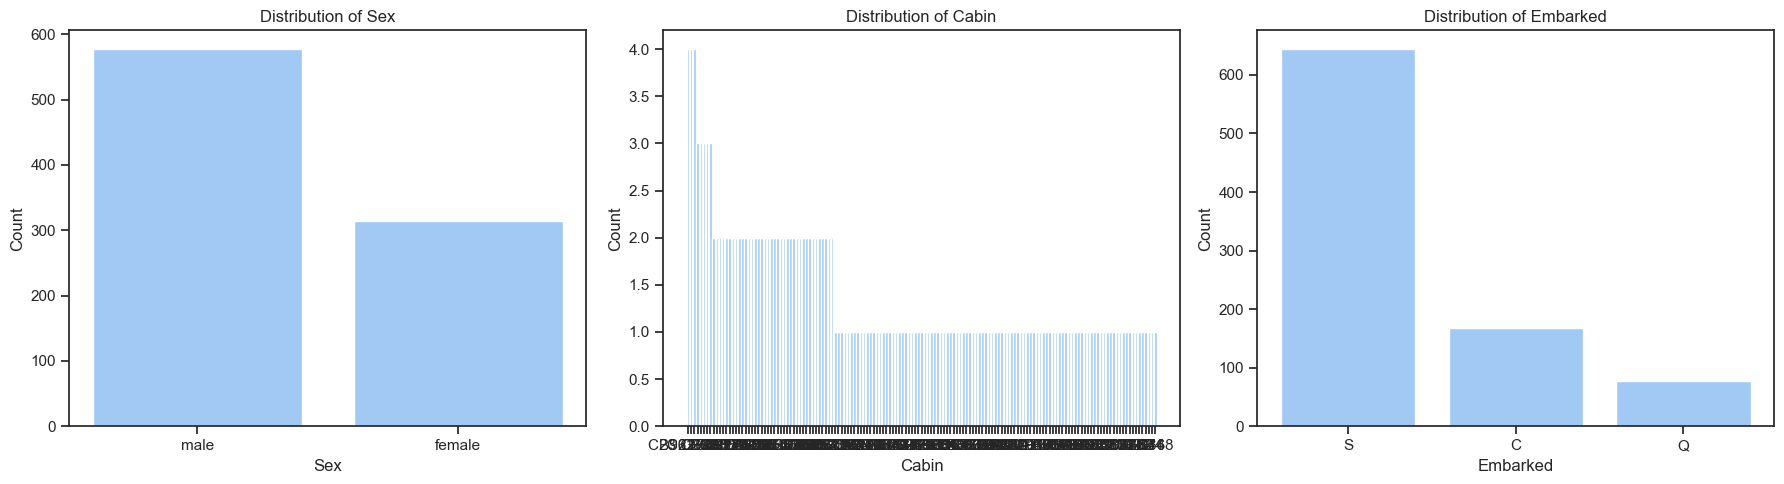

In [13]:
# Visual Plot showing the speard of all categorical variables

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for ax, col in zip(axes, cat_columns):
    value_counts = X_train[col].value_counts()
    ax.bar(value_counts.index, value_counts.values)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

- For Gender, most of the individuals on the ship are male. <br>
- Most people are Embarked to Southampton

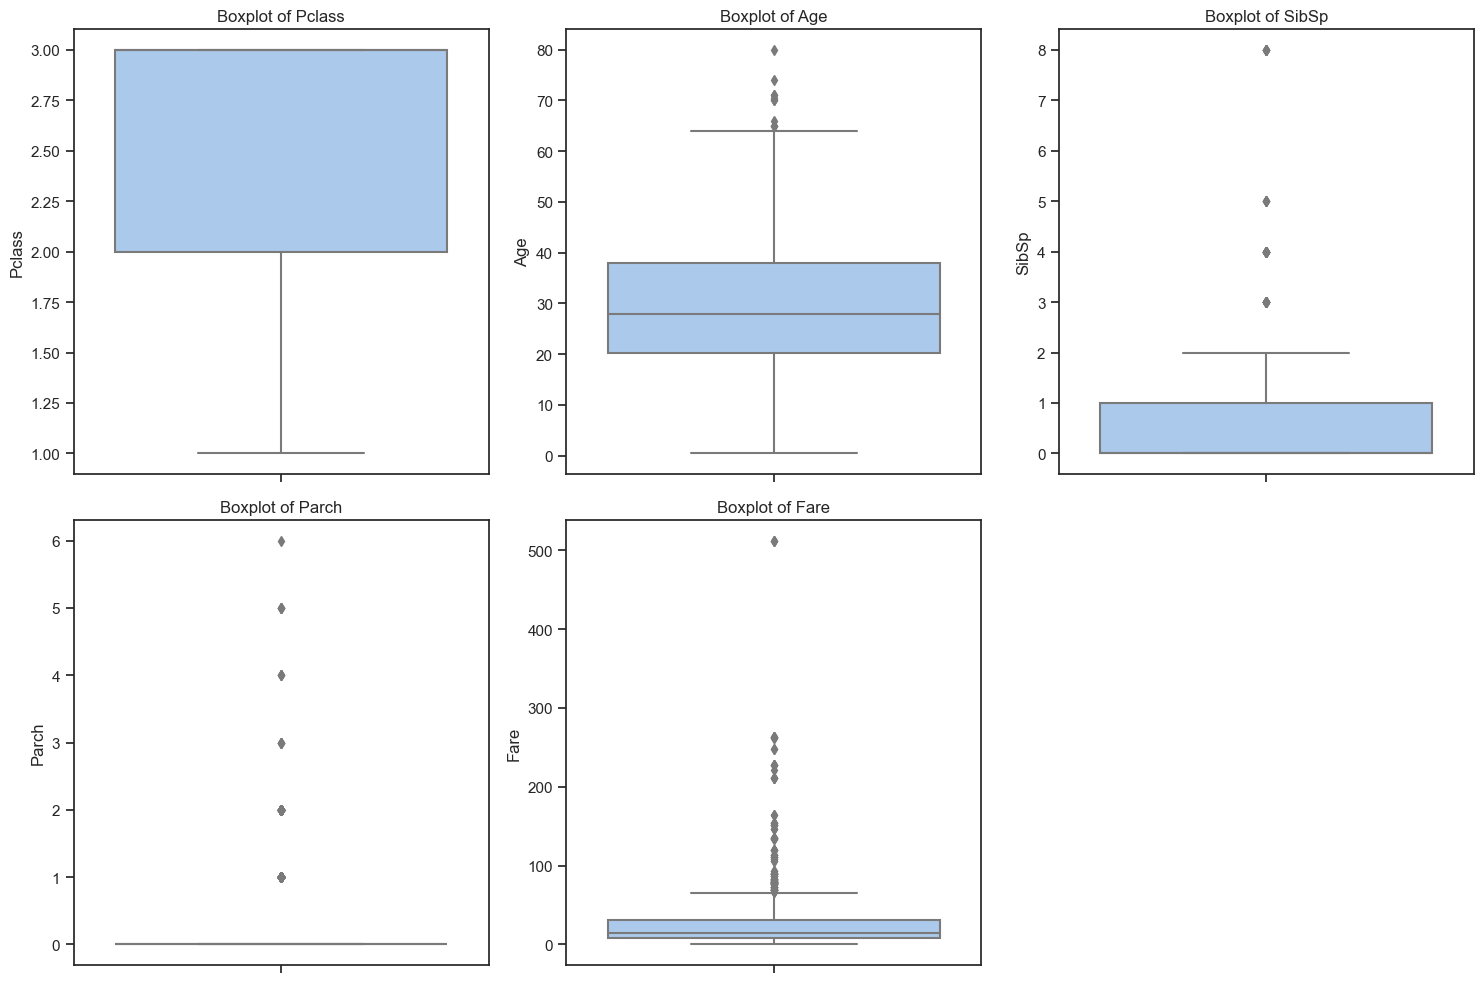

In [14]:
# Box plot for all numerical values

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=X_train[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

- Most passengers are in the 3rd class Parch
- Few of the passengers are above 65%; anyone above 65 years of age are outliers
- Most people have 2 or less sublings or spouse on the ship
- Most people spent less than £100; people that spent outside £100 are outliers
- People witj 1 or above parent or child are outliers; most people have no parent or child on the ship

In [15]:
# Check for null values

X_train.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [16]:
X_test.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

The columns Age, Cabin and Embarked has 177, 687 and 2 respectively. <br>

How do I address this? <br>
- Age - Fill the null values with the average age (mean) on X_train 
- Cabin - Drop the column from both X_train & X_test
- Embarked - Fill the null values with most common value (mode) on X_train

In [17]:
# For Age
X_train["Age"].fillna(X_train["Age"].mean(), inplace=True)
X_test["Age"].fillna(X_test["Age"].mean(), inplace=True)

# For Cabin for X_train & X_test
X_train.drop(columns=["Cabin"], inplace=True)
X_test.drop(columns=["Cabin"], inplace=True)

# For Embarked
X_train["Embarked"].fillna(X_train["Embarked"].mode()[0], inplace=True)

#For Fare
X_test["Fare"].fillna(X_train["Fare"].mean(), inplace=True)

In [18]:
# Recheck for null values again

X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
X_test.isnull().sum()


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

There is no empty cell 

In [20]:
# Get just the target values for y_test

y_test = y_test["Survived"]

In [21]:
# Check the shape of all train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(891, 7)
(418, 7)
(891,)
(418,)


Now, I have 7 features to train my model

In [22]:
# Data Preprocessing

# Encode all catgorical features

features_for_encoding = X_train.select_dtypes(include=["object"]).columns.tolist()
features_for_encoding

['Sex', 'Embarked']

In [23]:
le = LabelEncoder()

for i in features_for_encoding:
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])


In [24]:
# View the first 5 rows of X_train

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [25]:
# View the first 5 rows of X_test

X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [26]:
# Scale the X_train & X_test using standard scaler

sc = StandardScaler()

scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.fit_transform(X_test)

In [27]:
scaled_X_train[0:5]

array([[ 0.82737724,  0.73769513, -0.5924806 ,  0.43279337, -0.47367361,
        -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.63878901,  0.43279337, -0.47367361,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.2846632 , -0.4745452 , -0.47367361,
        -0.48885426,  0.58595414],
       [-1.56610693, -1.35557354,  0.40792596,  0.43279337, -0.47367361,
         0.42073024,  0.58595414],
       [ 0.82737724,  0.73769513,  0.40792596, -0.4745452 , -0.47367361,
        -0.48633742,  0.58595414]])

In [28]:
scaled_X_test[0:5]

array([[ 0.87348191,  0.75592895,  0.3349926 , -0.49947002, -0.4002477 ,
        -0.49825799, -0.47091535],
       [ 0.87348191, -1.32287566,  1.32553003,  0.61699237, -0.4002477 ,
        -0.51312516,  0.70076689],
       [-0.31581919,  0.75592895,  2.51417495, -0.49947002, -0.4002477 ,
        -0.46493955, -0.47091535],
       [ 0.87348191,  0.75592895, -0.25932986, -0.49947002, -0.4002477 ,
        -0.48331732,  0.70076689],
       [ 0.87348191, -1.32287566, -0.65554483,  0.61699237,  0.61989583,
        -0.41832278,  0.70076689]])

In [29]:
#Initailse different classification algorithms

classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB()
]

classifier_names = [
    'Logistic Regression',
    'Random Forest',
    'Support Vector Classifier',
    'K-Nearest Neighbors',
    'Decision Tree',
    'Naive Bayes'
]

In [30]:
results = {}
for clf, name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, scaled_X_train, y_train, cv=5)
    results[name] = cv_scores.mean()
    print(f"{name}: {cv_scores.mean():.4f}")

Logistic Regression: 0.7845
Random Forest: 0.8115
Support Vector Classifier: 0.8272
K-Nearest Neighbors: 0.8014
Decision Tree: 0.7655
Naive Bayes: 0.7913


In [31]:
# Get the top 3 models for cross validation

sorted_results = sorted(results.items(), key=lambda item: item[1], reverse=True)
print(sorted_results)
top_models = [name for name, score in sorted_results[:3]]
print("Top Performing Models:", top_models)

[('Support Vector Classifier', 0.827154604230745), ('Random Forest', 0.8114744837110036), ('K-Nearest Neighbors', 0.8013684012303056), ('Naive Bayes', 0.7912685958194715), ('Logistic Regression', 0.7845207457158998), ('Decision Tree', 0.7654698386793045)]
Top Performing Models: ['Support Vector Classifier', 'Random Forest', 'K-Nearest Neighbors']


In [35]:
# Set up GridSearchCV for the top 3 performing model

param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Support Vector Classifier': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [10, 20, 30]
    }
}
best_models = {}

for model_name in top_models:
    clf = classifiers[classifier_names.index(model_name)]
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(scaled_X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, k

In [38]:
for model_name, model in best_models.items():
    print(f"Best parameters for {model_name}:")
    best_params = model.get_params()
    grid_params = param_grids[model_name]
    used_params = {param: value for param, value in best_params.items() if param in grid_params.keys()}
    print(used_params)
    print()

Best parameters for Support Vector Classifier:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Best parameters for Random Forest:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Best parameters for K-Nearest Neighbors:
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 7, 'weights': 'uniform'}



Model: Support Vector Classifier
Accuracy: 0.9210526315789473
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       266
           1       0.93      0.85      0.89       152

    accuracy                           0.92       418
   macro avg       0.92      0.91      0.91       418
weighted avg       0.92      0.92      0.92       418

Confusion Matrix:
 [[256  10]
 [ 23 129]]


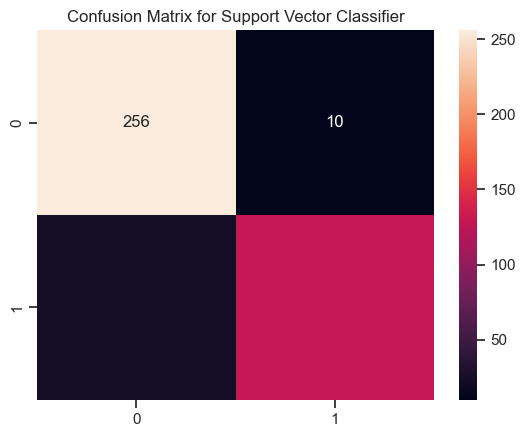

Model: Random Forest
Accuracy: 0.8564593301435407
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       266
           1       0.87      0.72      0.78       152

    accuracy                           0.86       418
   macro avg       0.86      0.83      0.84       418
weighted avg       0.86      0.86      0.85       418

Confusion Matrix:
 [[249  17]
 [ 43 109]]


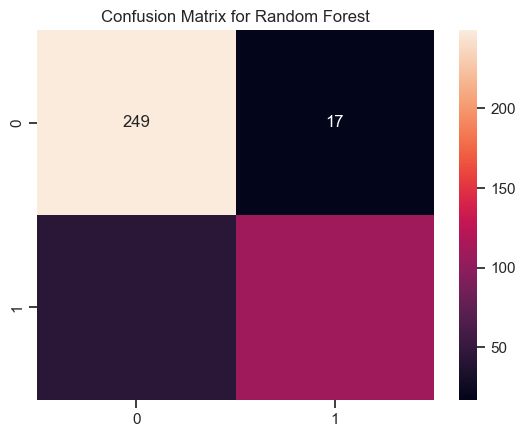

Model: K-Nearest Neighbors
Accuracy: 0.8755980861244019
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       266
           1       0.81      0.86      0.83       152

    accuracy                           0.88       418
   macro avg       0.86      0.87      0.87       418
weighted avg       0.88      0.88      0.88       418

Confusion Matrix:
 [[236  30]
 [ 22 130]]


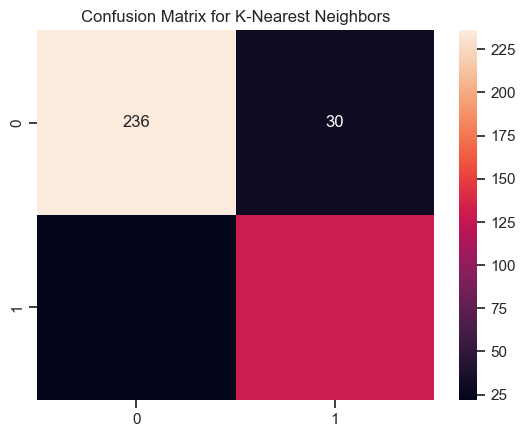

In [39]:
#Model Evaluation
for name, model in best_models.items():
    y_pred = model.predict(scaled_X_test)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

The best performing model is Support Vector Classifier with an accuracy of 92.1%
Explain the prcision, sensitivity, specificity, F1 - Score ....

**Do feature importance